# MODEL COMPARISON & FINAL REPORT

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# 1. Load metrics từ file

In [13]:
metrics_path = '../results/metrics.json'

raw_data = {
    "linear": {
        "rmse": 0.13717754997373005,
        "mae": 0.08900183409541117,
        "r2": 0.8821396071345375
    },
    "ridge": {
        "rmse": 0.11354505896919401,
        "mae": 0.07825276845280908,
        "r2": 0.9192507902477113
    },
    "random_forest": {
        "rmse": 0.1390305302244933,
        "mae": 0.09664777658571148,
        "r2": 0.8789340097851351
    },
    "xgboost": {
        "rmse": 0.11737232336632754,
        "mae": 0.0807299645548374,
        "r2": 0.9137154172408615
    },
    "lightgbm": {
        "rmse": 0.12504092968258593,
        "mae": 0.0850442764778389,
        "r2": 0.9020721570430447
    },
    "stacking_ensemble": {
        "rmse": 0.11236698606657156,
        "mae": 0.07614727985702344,
        "r2": 0.9209177048617667
    },
    "averaging": {
        "rmse": 0.11398074748197222,
        "mae": 0.07730827481252303,
        "r2": 0.918629908958181
    },
    "weighted_ensemble": {
        "rmse": 0.11313268419171628,
        "mae": 0.07677626958784012,
        "r2": 0.919836257724601
    }
}

if os.path.exists(metrics_path):
    try:
        with open(metrics_path, 'r') as f:
            data = json.load(f)
        print(f" Đã load dữ liệu từ {metrics_path}")
    except Exception as e:
        print(f" Lỗi đọc file, dùng dữ liệu backup. Lỗi: {e}")
        data = raw_data
else:
    print(" Không tìm thấy metrics.json → dùng dữ liệu backup.")
    data = raw_data

 Đã load dữ liệu từ ../results/metrics.json


# 2. Xử lý DataFrame

In [14]:
df = pd.DataFrame(data).T.reset_index()
df.columns = ['Model', 'RMSE', 'MAE', 'R2']

df = df[df['Model'] != 'osel_final']

def classify_model(name):
    if 'ensemble' in name or 'averaging' in name:
        return 'Ensemble'
    return 'Base Model'

df['Type'] = df['Model'].apply(classify_model)
df = df.sort_values(by='RMSE', ascending=False)

print("Bảng tổng hợp kết quả:")
df


Bảng tổng hợp kết quả:


,Model,RMSE,MAE,R2,Type
2,random_forest,0.139031,0.096648,0.878934,Base Model
0,linear,0.137178,0.089002,0.882140,Base Model
4,lightgbm,0.125041,0.085044,0.902072,Base Model
3,xgboost,0.117372,0.080730,0.913715,Base Model
6,averaging,0.113981,0.077308,0.918630,Ensemble
1,ridge,0.113545,0.078253,0.919251,Base Model
7,weighted_ensemble,0.113133,0.076776,0.919836,Ensemble
5,stacking_ensemble,0.112367,0.076147,0.920918,Ensemble


# 3. Biểu đồ RMSE

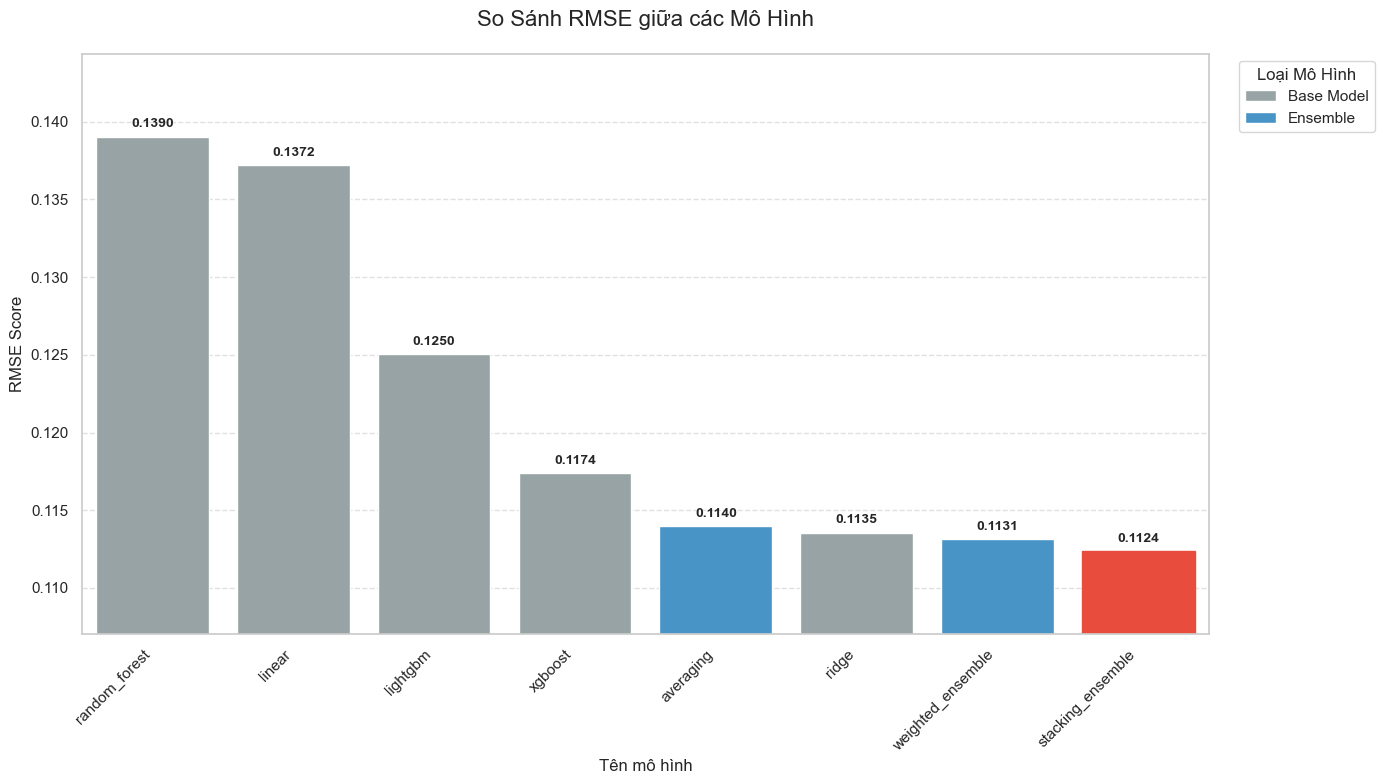

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.figure(figsize=(14, 8))

palette = {'Base Model': '#95a5a6', 'Ensemble': '#3498db'}
ax = sns.barplot(data=df, x='Model', y='RMSE', hue='Type', dodge=False, palette=palette)

# Tìm giá trị RMSE thấp nhất (tốt nhất)
best_rmse = df['RMSE'].min()

# Cập nhật logic highlight và ghi số liệu trên đỉnh cột
for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        # Highlight mô hình tốt nhất bằng màu đỏ
        if abs(height - best_rmse) < 1e-6:
            p.set_color('#e74c3c')
            p.set_alpha(1.0)
        
        # Ghi giá trị RMSE trên đầu mỗi cột
        ax.annotate(f'{height:.4f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontweight='bold',
                    fontsize=10)

# Điều chỉnh trục Y để thấy rõ độ chênh lệch
min_val = df['RMSE'].min()
max_val = df['RMSE'].max()
padding = (max_val - min_val) * 0.2
plt.ylim(min_val - padding, max_val + padding)

# Trang trí biểu đồ
plt.title('So Sánh RMSE giữa các Mô Hình', fontsize=16, pad=20)
plt.xlabel('Tên mô hình', fontsize=12)
plt.ylabel('RMSE Score', fontsize=12)

# Xoay tên mô hình nếu quá dài để tránh chồng lấn
plt.xticks(rotation=45, ha='right')

# Thêm lưới ngang để dễ so sánh độ cao
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(title='Loại Mô Hình', bbox_to_anchor=(1.02, 1), loc='upper left')

# Lưu và hiển thị
plt.tight_layout()
os.makedirs('results/figures', exist_ok=True)
plt.savefig('results/figures/model_comparison_rmse.png', bbox_inches='tight')
plt.show()

# 4. Biểu đồ MAE

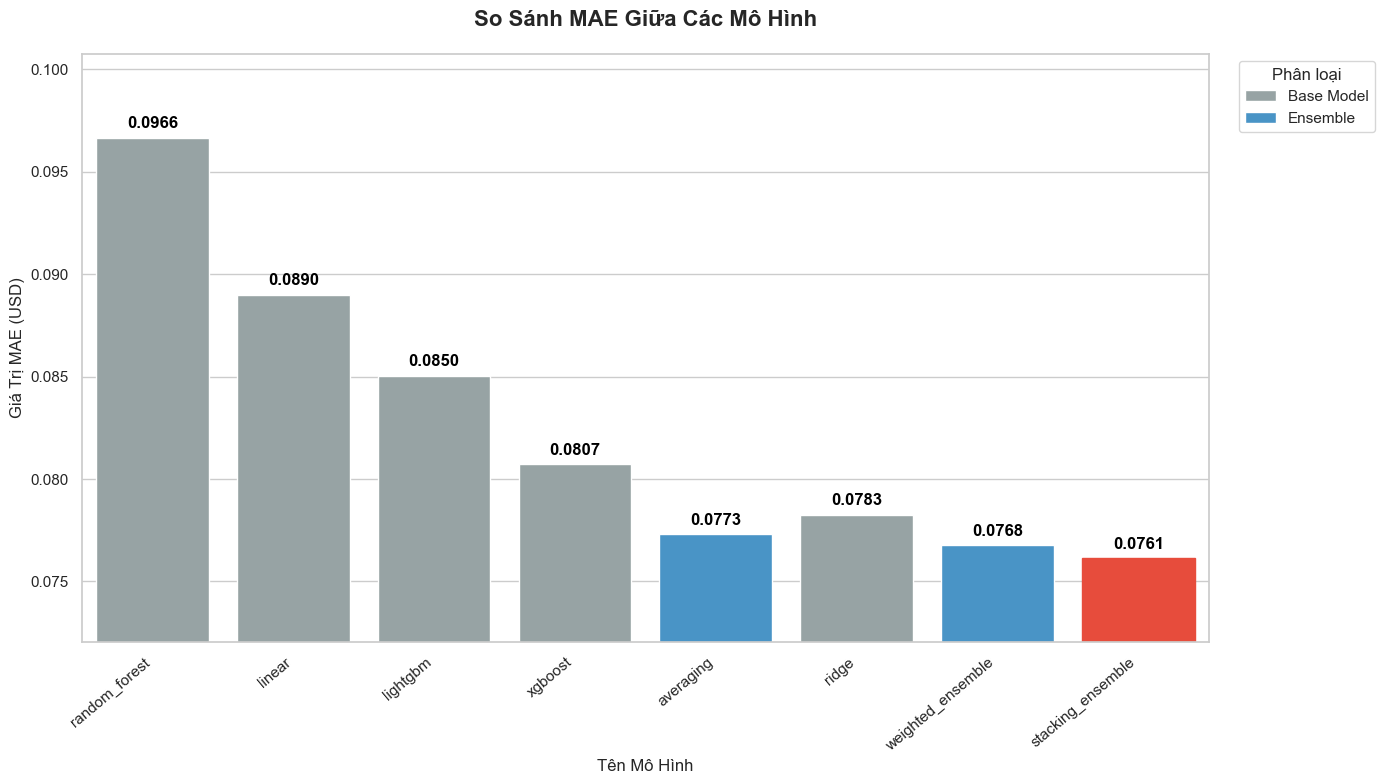

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cấu hình kích thước và style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid") 

# Đảo ngược x và y: x là tên Model, y là giá trị MAE
palette = {'Base Model': '#95a5a6', 'Ensemble': '#3498db'}
ax = sns.barplot(data=df, x='Model', y='MAE', hue='Type', dodge=False, palette=palette)

# Tìm MAE tốt nhất (nhỏ nhất)
best_mae = df['MAE'].min()

# Ghi số liệu và Highlight mô hình tốt nhất
for p in ax.patches:
    val = p.get_height()
    if val > 0:
        # Nếu là mô hình có MAE thấp nhất
        if abs(val - best_mae) < 0.0001:
            p.set_color('#e74c3c')
            p.set_alpha(1.0)

        ax.annotate(f'{val:.4f}', 
                    (p.get_x() + p.get_width() / 2., val),
                    ha='center', va='center',
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontweight='bold',
                    color='black')

# TỐI ƯU TRỤC Y: Độ chia nhỏ hơn để thấy rõ sự khác biệt
min_y = df['MAE'].min()
max_y = df['MAE'].max()
range_y = max_y - min_y
plt.ylim(min_y - range_y * 0.2, max_y + range_y * 0.2) 

# Hoàn thiện format
plt.title('So Sánh MAE Giữa Các Mô Hình', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tên Mô Hình', fontsize=12)
plt.ylabel('Giá Trị MAE (USD)', fontsize=12)

# Xoay tên các mô hình để tránh đè chữ
plt.xticks(rotation=40, ha='right')

# Thêm chú thích
plt.legend(title='Phân loại', bbox_to_anchor=(1.02, 1), loc='upper left')

# Lưu file
plt.tight_layout()
os.makedirs('results/figures', exist_ok=True)
plt.savefig('results/figures/model_comparison_mae.png', bbox_inches='tight')
plt.show()

# 5. Biểu đồ R2

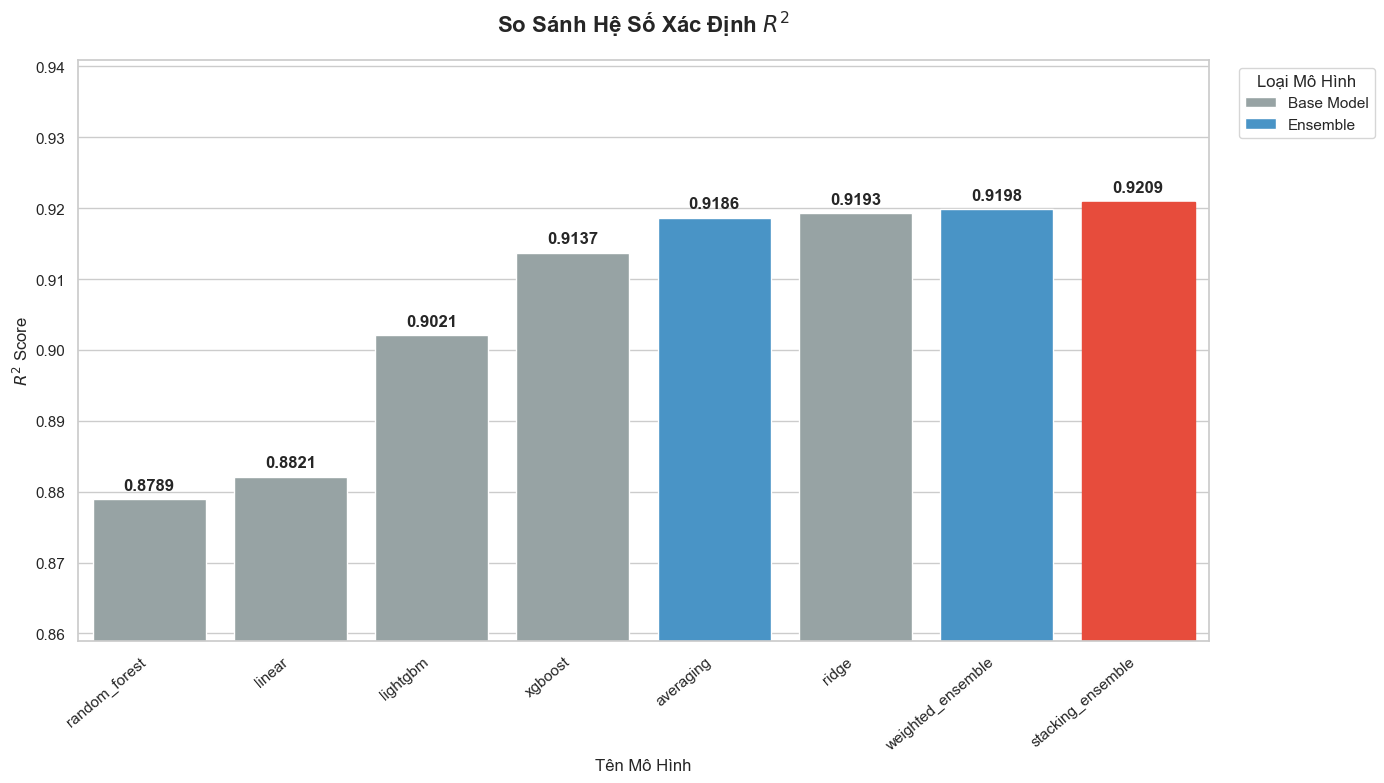

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Khởi tạo figure
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Vẽ biểu đồ cột dọc (x là Model, y là R2)
palette = {'Base Model': '#95a5a6', 'Ensemble': '#3498db'}
ax = sns.barplot(data=df, x='Model', y='R2', hue='Type', dodge=False, palette=palette)

# Tìm R2 cao nhất để highlight
best_r2 = df['R2'].max()

# Ghi số liệu và highlight mô hình tốt nhất
for p in ax.patches:
    val = p.get_height()
    if val > 0:
        # Highlight mô hình có R2 cao nhất 
        if abs(val - best_r2) < 0.0001:
            p.set_color('#e74c3c')
            p.set_alpha(1.0)
        
        # Thêm nhãn giá trị trên đỉnh cột
        ax.annotate(f'{val:.4f}', 
                    (p.get_x() + p.get_width() / 2., val),
                    ha='center', va='center',
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontweight='bold')

# TỐI ƯU ĐỘ CHIA TRỤC Y: Tập trung vào khoảng giá trị R2
# Với R2, các mô hình thường tập trung ở dải 0.85 - 0.95
min_y = df['R2'].min()
max_y = df['R2'].max()
# Padding để không bị sát mép trên/dưới quá
plt.ylim(min_y - 0.02, min(1.0, max_y + 0.02)) 

# Định dạng biểu đồ
plt.title('So Sánh Hệ Số Xác Định $R^2$', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tên Mô Hình', fontsize=12)
plt.ylabel('$R^2$ Score', fontsize=12)

# Xoay tên mô hình
plt.xticks(rotation=40, ha='right')

# Chú thích
plt.legend(title='Loại Mô Hình', bbox_to_anchor=(1.02, 1), loc='upper left')

# Lưu và hiển thị
plt.tight_layout()
os.makedirs('results/figures', exist_ok=True)
plt.savefig('results/figures/model_comparison_r2.png', bbox_inches='tight')
plt.show()